In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better readability
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = iris.target

# Preprocess the data: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train each model and evaluate it using cross-validation
cv_results = {}
for model_name, model in models.items():
    # Cross-validation accuracy scores
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_score.mean()

# Display the results
print("Cross-validation accuracy scores:")
for model_name, score in cv_results.items():
    print(f"{model_name}: {score:.4f}")

# Select the best model based on cross-validation score
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model on test data: {accuracy:.4f}")

# Visualize the results: Plot feature importances for Random Forest (if it's the best model)
if best_model_name == 'Random Forest':
    feature_importances = best_model.feature_importances_
    plt.barh(iris.feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importances')
    plt.show()


Cross-validation accuracy scores:
Random Forest: 0.9417
Logistic Regression: 0.9583
Support Vector Classifier: 0.9500
K-Nearest Neighbors: 0.9333

Best model: Logistic Regression
Accuracy of the best model on test data: 1.0000



Tuning hyperparameters for Linear Regression...


c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Linear Regression: {}
Best cross-validation score for Linear Regression: 0.6111

Tuning hyperparameters for Random Forest Regressor...
Best parameters for Random Forest Regressor: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
Best cross-validation score for Random Forest Regressor: 0.8020

Tuning hyperparameters for Support Vector Regressor...


c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Support Vector Regressor: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best cross-validation score for Support Vector Regressor: 0.7338

Linear Regression Results:
Mean Squared Error: 0.5559
R^2 Score: 0.5758


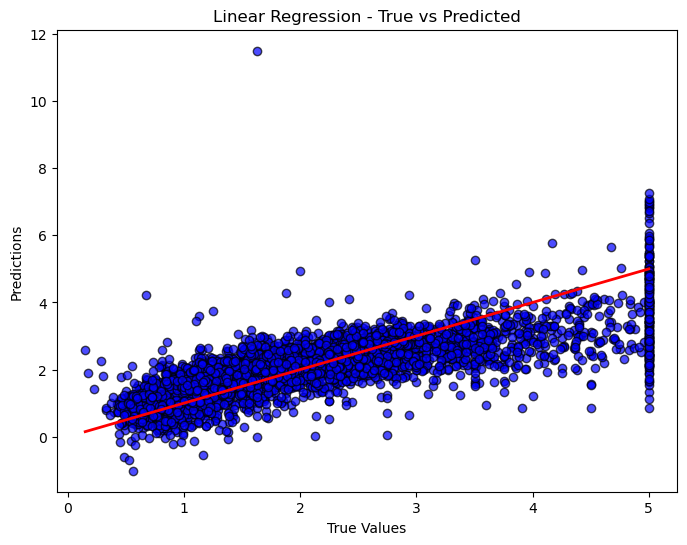


Random Forest Regressor Results:
Mean Squared Error: 0.2531
R^2 Score: 0.8069


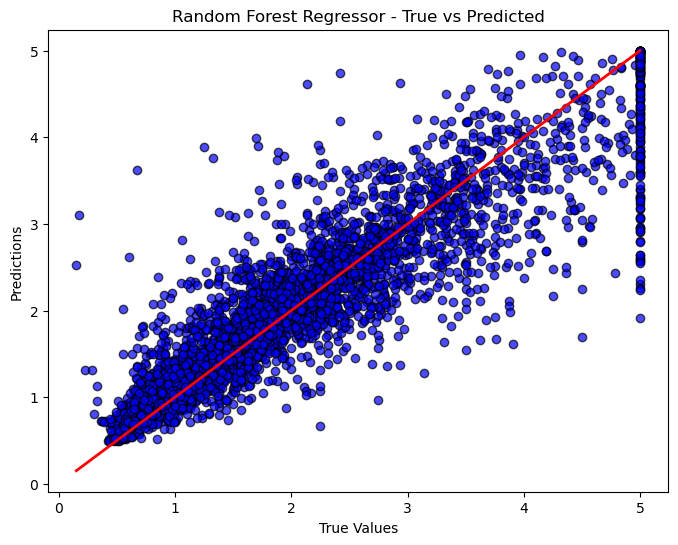


Support Vector Regressor Results:
Mean Squared Error: 0.3570
R^2 Score: 0.7276


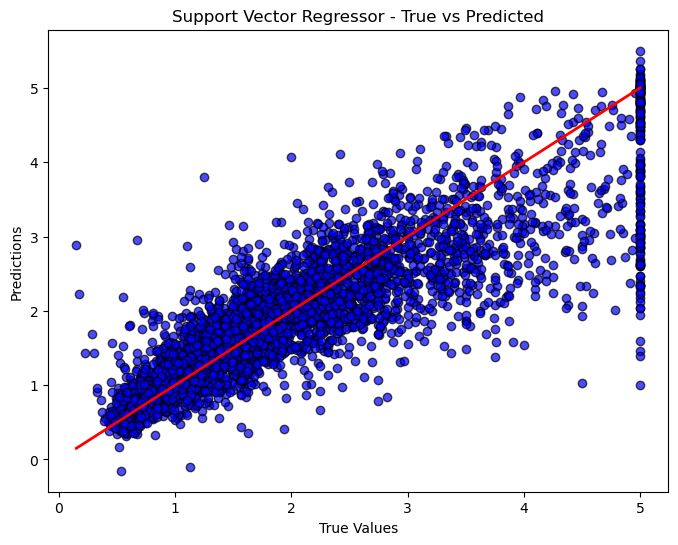

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing  # California housing dataset
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset (California housing data)
california = fetch_california_housing()
X = california.data
y = california.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Hyperparameter grids for tuning (reduced search space)
param_grids = {
    'Linear Regression': {},
    'Random Forest Regressor': {
        'n_estimators': [100, 200],  # Reduced number of estimators
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Support Vector Regressor': {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
    }
}

# Perform RandomizedSearchCV for hyperparameter tuning
best_models = {}
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    param_grid = param_grids[model_name]
    
    search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
    search.fit(X_train_scaled, y_train)
    
    # Get the best model and parameters
    best_model = search.best_estimator_
    best_params = search.best_params_
    best_models[model_name] = best_model
    
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {search.best_score_:.4f}")

# Evaluate the models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    
    # Plotting the predictions vs true values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{model_name} - True vs Predicted')
    plt.show()


In [10]:
import joblib

# Save the best model found by RandomizedSearchCV (replace 'best_rf_model' with the correct variable)
best_model = best_models['Random Forest Regressor']
joblib.dump(best_model, 'best_random_forest_model.pkl')

print("Best model saved!")


Best model saved!


In [11]:
# Load the saved model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Predict with the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate the loaded model
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print(f"Loaded Model Results:")
print(f"Mean Squared Error (MSE): {mse_loaded:.4f}")
print(f"R^2 Score: {r2_loaded:.4f}")


Loaded Model Results:
Mean Squared Error (MSE): 0.2531
R^2 Score: 0.8069


In [14]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample data
data = load_iris()
X = data.data
y = data.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Save the best model found by RandomizedSearchCV
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

print("Best model saved!")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best model saved!


In [17]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Assuming you've loaded your data already and split it into X_train, X_test, y_train, and y_test

# Create a pipeline for preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('model', RandomForestRegressor())  # Random forest regressor model
])

# Fit the pipeline with your training data
pipeline.fit(X_train, y_train)

# Save the pipeline to a file
joblib.dump(pipeline, 'best_random_forest_model_with_scaling.pkl')
print("Pipeline saved!")

# Load the pipeline (including model and scaling)
loaded_pipeline = joblib.load('best_random_forest_model_with_scaling.pkl')

# Predict using the loaded pipeline
y_pred_loaded = loaded_pipeline.predict(X_test)

# Evaluate the model's performance
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

# Print the evaluation metrics
print(f"Loaded Model Results:")
print(f"Mean Squared Error (MSE): {mse_loaded:.4f}")
print(f"R^2 Score: {r2_loaded:.4f}")


Pipeline saved!
Loaded Model Results:
Mean Squared Error (MSE): 0.0007
R^2 Score: 0.9989


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 383}

Random Forest Regressor Results:
Mean Squared Error (MSE): 0.2546
R^2 Score: 0.8057


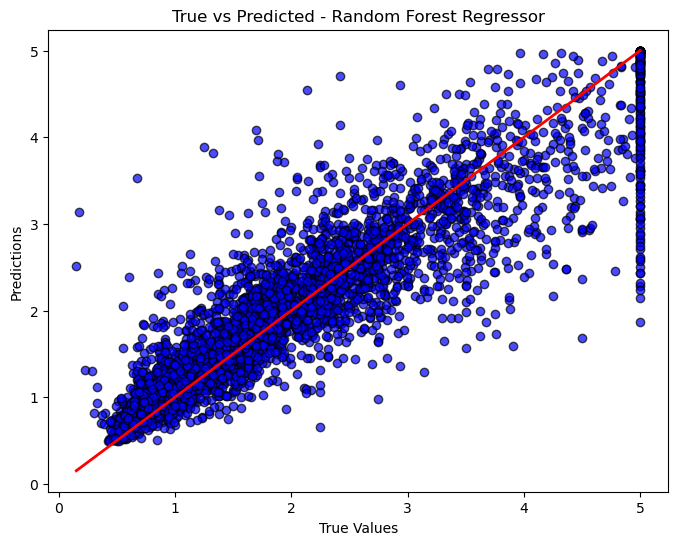

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing  # Load California housing dataset
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 6),  # Minimum samples required at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Apply RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest Regressor Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plotting the predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted - Random Forest Regressor')
plt.show()


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)

# Define hyperparameter grids for GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],                # Regularization strength
    'solver': ['liblinear', 'saga'],         # Optimization algorithm
    'max_iter': [100, 200, 500]              # Maximum iterations
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum samples required at a leaf node
}

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10],                # Regularization parameter
    'kernel': ['linear', 'rbf'],             # Kernel type
    'gamma': ['scale', 'auto']              # Kernel coefficient
}

# Create a dictionary for classifiers and their parameter grids
classifiers = {
    'Logistic Regression': (lr, param_grid_lr),
    'Random Forest': (rf, param_grid_rf),
    'SVM': (svc, param_grid_svc)
}

# Initialize the best classifier and score variables
best_classifier = None
best_score = 0
best_model = None

# Loop through each classifier and perform GridSearchCV
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Performing GridSearchCV for {clf_name}...")
    
    # Apply GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and score
    best_model_current = grid_search.best_estimator_
    best_score_current = grid_search.best_score_
    
    print(f"Best Score for {clf_name}: {best_score_current:.4f}")
    print(f"Best Parameters for {clf_name}: {grid_search.best_params_}")
    
    # Store the best classifier if it improves upon the previous best score
    if best_score_current > best_score:
        best_classifier = clf_name
        best_score = best_score_current
        best_model = best_model_current

# Final evaluation of the best model
print(f"\nBest Classifier: {best_classifier}")
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")


Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Score for Logistic Regression: 0.9750
Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
Performing GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Score for Random Forest: 0.9583
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Performing GridSearchCV for SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score for SVM: 0.9583
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Best Classifier: Logistic Regression
Accuracy on Test Set: 1.0000


In [23]:
# Import necessary libraries for K-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Perform K-fold cross-validation on the best model
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Function to perform cross-validation
def cross_validate_model(model, X, y):
    # Calculate cross-validation score using StratifiedKFold (for classification problems)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)
    return cv_scores

# Loop through each classifier and perform K-fold cross-validation
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"\nPerforming K-fold Cross-Validation for {clf_name}...")
    
    # Apply GridSearchCV to find the best model
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Best model after GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Perform K-fold cross-validation on the best model
    cv_scores = cross_validate_model(best_model, X, y)
    
    print(f"Best Parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Cross-validation Scores for {clf_name}: {cv_scores}")
    print(f"Mean CV Score for {clf_name}: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation of CV Score for {clf_name}: {np.std(cv_scores):.4f}")

# Final evaluation of the best model after K-fold cross-validation
print("\nFinal Evaluation on Test Set with Best Classifier:")
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")



Performing K-fold Cross-Validation for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
Cross-validation Scores for Logistic Regression: [1.         1.         1.         1.         0.93333333 0.86666667
 1.         1.         1.         1.        ]
Mean CV Score for Logistic Regression: 0.9800
Standard Deviation of CV Score for Logistic Regression: 0.0427

Performing K-fold Cross-Validation for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validation Scores for Random Forest: [1.         1.         1.         0.93333333 0.86666667 0.93333333
 1.         1.         0.93333333 0.86666667]
Mean CV Score for Random Forest: 0.9533
Standard Deviation of CV Score for Random Forest: 0.0521

Performing K-fold Cross-Validation for SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for SVM: {'C': 1, 'gamma

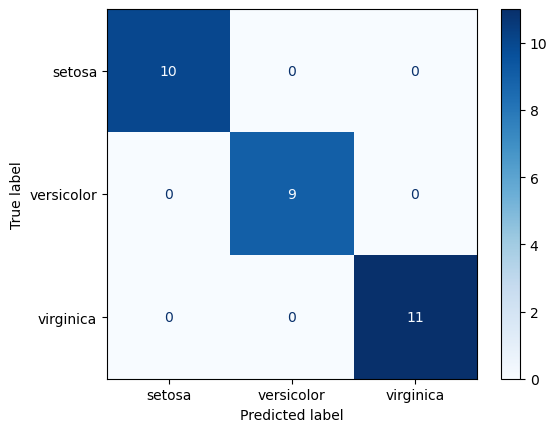

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for the best model on the test set
y_pred = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')


In [25]:
from sklearn.metrics import classification_report

# Classification report for the best model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 199, in 

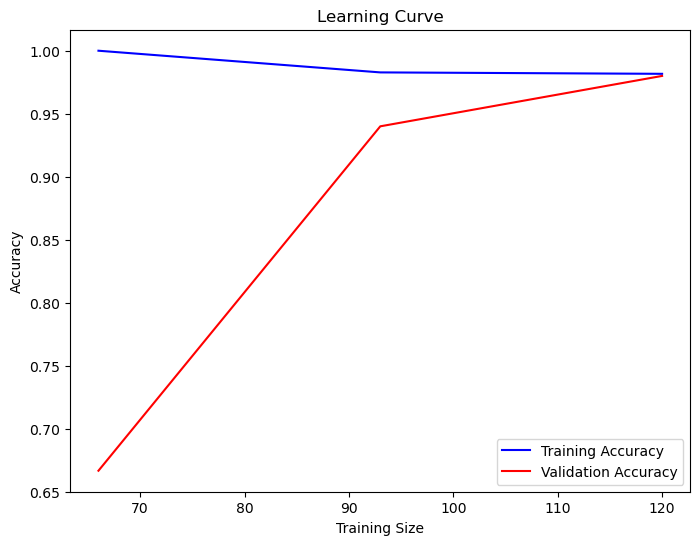

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Learning curve for the best model
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, n_jobs=-1)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='red')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [29]:
from sklearn.svm import SVC

# Initialize the SVC model with probability=True
best_model = SVC(probability=True)

# Train the model on your data
best_model.fit(X_train, y_train)

# Now you can use predict_proba
y_prob = best_model.predict_proba(X_test)


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define multiple metrics for cross-validation
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Cross-validation with different metrics for the best model
for scorer_name, scorer in scorers.items():
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring=scorer, n_jobs=-1)
    print(f"Cross-Validation {scorer_name} Scores: {cv_scores}")
    print(f"Mean {scorer_name}: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation of {scorer_name}: {np.std(cv_scores):.4f}\n")


Cross-Validation accuracy Scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean accuracy: 0.9667
Standard Deviation of accuracy: 0.0211

Cross-Validation precision Scores: [0.96969697 0.96969697 0.96969697 0.93333333 1.        ]
Mean precision: 0.9685
Standard Deviation of precision: 0.0211

Cross-Validation recall Scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean recall: 0.9667
Standard Deviation of recall: 0.0211

Cross-Validation f1 Scores: [0.96658312 0.96658312 0.96658312 0.93333333 1.        ]
Mean f1: 0.9666
Standard Deviation of f1: 0.0211



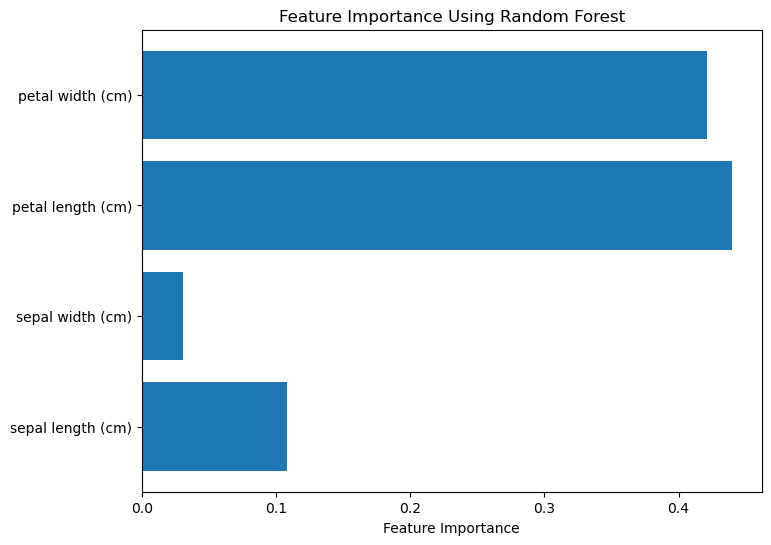

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model on the data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), iris.feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Using Random Forest')
plt.show()


In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)


Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
cv_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the best model (you can choose any model)
    best_model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = best_model.predict(X_test)
    cv_scores.append(accuracy_score(y_test, y_pred))

# Print cross-validation results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


Cross-Validation Accuracy: 0.9667 ± 0.0298


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Compare models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


c:\Users\Revanth Varma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Mean Accuracy: 0.9733 ± 0.0249
Random Forest - Mean Accuracy: 0.9467 ± 0.0452
SVM - Mean Accuracy: 0.9667 ± 0.0211


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Accuracy on Test Data: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy on Test Data: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define base learners
base_learners = [
    ('logreg', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC())
]

# Define meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
y_pred = stacking_model.predict(X_test)
print(f"Accuracy of Stacking Classifier: {accuracy_score(y_test, y_pred):.4f}")


Accuracy of Stacking Classifier: 0.9667
